# Notebook for Silver Linings book

## 1. Chapter: Mortality, productivity, and fertility in the U.S.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1.1. Create births, deaths, and productivity charts

,year,tfp_cnst_price_index,tfp_cnst_price_pctchg,tfp_prv_nf_bus_pctchg,tfp_prv_nf_bus_index,labprod_prv_nf_bus_pctchg,labprod_prv_nf_bus_index
0,1954,0.651450,NaN,NaN,NaN,NaN,NaN
1,1955,0.672531,3.235934,NaN,NaN,NaN,NaN
2,1956,0.668704,-0.568926,NaN,NaN,NaN,NaN
3,1957,0.675979,1.087798,NaN,NaN,NaN,NaN
4,1958,0.677200,0.180654,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
65,2019,1.016796,0.856037,1.3,1.019078,2.5,1.039350
66,2020,NaN,NaN,-0.2,1.017040,5.9,1.100672
67,2021,NaN,NaN,3.2,1.049585,1.3,1.114980
68,2022,NaN,NaN,-1.6,1.032792,-2.1,1.091566


#### 1.1.1. Total US births and deaths: 1950-2100

In [47]:
# Read in birth and death data. Historical US births and deaths historical data
# and forecasts come from Our World in Data, "Births and deaths per year,
# United States: historic estimates with future projectsion based on the UN
# medium scenario",
# https://ourworldindata.org/grapher/births-and-deaths-projected-to-2100?country=~USA
# and "Birth rate vs. death rate, 2023",
# https://ourworldindata.org/grapher/birth-rate-vs-death-rate?country=~USA. The
# original source data come from "World Population Prospects", United Nations,
# https://population.un.org/wpp/.
birth_death_df = pd.read_csv(
    './data/owd_births_deaths.csv', header=9,
    dtype={
        'year':np.int32, 'births_per_1k_hst': np.float64,
        'births_per_1k_frc': np.float64, 'deaths_per_1k_hst': np.float64,
        'deaths_per_1k_frc': np.float64, 'tot_pop':np.float64,
        'tot_deaths_hst': np.float64, 'tot_deaths_frc': np.float64,
        'tot_births_hst': np.float64, 'tot_births_frc': np.float64,
    }
)
birth_death_df

,year,births_per_1k_hst,births_per_1k_frc,deaths_per_1k_hst,deaths_per_1k_frc,tot_pop,tot_deaths_hst,tot_deaths_frc,tot_births_hst,tot_births_frc
0,1950,23.981,NaN,9.596,NaN,154202683.0,1479684.0,NaN,3697926.0,NaN
1,1951,24.352,NaN,9.603,NaN,156481322.0,1502719.0,NaN,3810644.0,NaN
2,1952,24.561,NaN,9.509,NaN,158794225.0,1509927.0,NaN,3900093.0,NaN
3,1953,24.539,NaN,9.436,NaN,161168319.0,1520815.1,NaN,3954926.0,NaN
4,1954,24.870,NaN,9.027,NaN,163636304.0,1477219.0,NaN,4069617.0,NaN
...,...,...,...,...,...,...,...,...,...,...
146,2096,NaN,8.588315,NaN,11.90473,NaN,NaN,4513263.0,NaN,3891035.0
147,2097,NaN,8.578221,NaN,11.90798,NaN,NaN,4535969.0,NaN,3902765.0
148,2098,NaN,8.570960,NaN,11.90866,NaN,NaN,4558804.0,NaN,3905290.0
149,2099,NaN,8.561096,NaN,11.90681,NaN,NaN,4582590.0,NaN,3913639.0


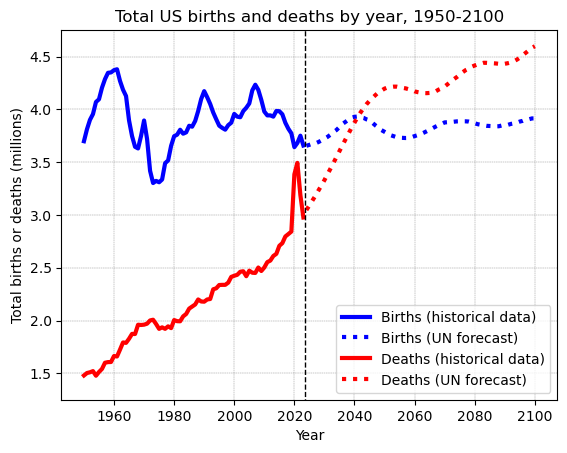

In [34]:
birth_death_tot_hst_df = birth_death_df[
    ['year', 'tot_births_hst', 'tot_deaths_hst']
][birth_death_df['year'] <= 2023]
years_hst = birth_death_tot_hst_df['year'].to_numpy()
tot_births_hst = birth_death_tot_hst_df['tot_births_hst'].to_numpy() / 1e6
tot_deaths_hst = birth_death_tot_hst_df['tot_deaths_hst'].to_numpy() / 1e6

birth_death_tot_frc_df = birth_death_df[
    ['year', 'tot_births_frc', 'tot_deaths_frc']
][birth_death_df['year'] > 2023]
years_frc = birth_death_tot_frc_df['year'].to_numpy()
tot_births_frc = birth_death_tot_frc_df['tot_births_frc'].to_numpy() / 1e6
tot_deaths_frc = birth_death_tot_frc_df['tot_deaths_frc'].to_numpy() / 1e6

fig1, ax1 = plt.subplots()
ax1.plot(
    years_hst, tot_births_hst, linestyle='-', color='blue', linewidth=3,
    label='Births (historical data)'
)
ax1.plot(
    years_frc, tot_births_frc, linestyle=':', color='blue', linewidth=3,
    label='Births (UN forecast)'
)
ax1.plot(
    years_hst, tot_deaths_hst, linestyle='-', color='red', linewidth=3,
    label='Deaths (historical data)'
)
ax1.plot(
    years_frc, tot_deaths_frc, linestyle=':', color='red', linewidth=3,
    label='Deaths (UN forecast)'
)
ax1.vlines(
    x=2023.5, ymin=1.0, ymax=5.0, color='black', linestyle='--', linewidth=1
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.ylim(1.25, 4.75)
plt.xlabel("Year")
plt.ylabel("Total births or deaths (millions)")
plt.legend()
plt.title("Total US births and deaths by year, 1950-2100")
plt.savefig('./images/us_birth_death_tot.png')
plt.show()

#### 1.1.2. US birth rates and death rates: 1950-2100

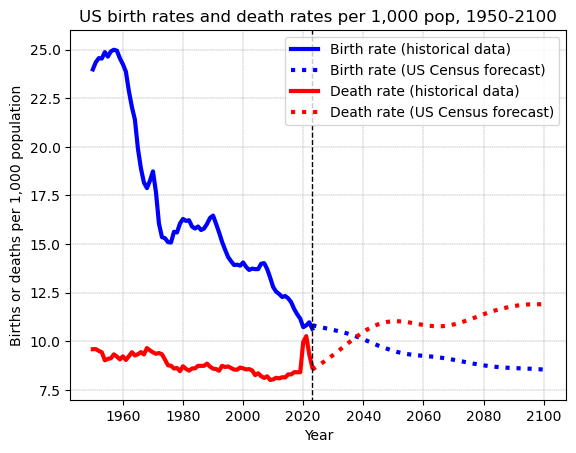

In [41]:
birth_death_rate_hst_df = birth_death_df[
    ['year', 'births_per_1k_hst', 'deaths_per_1k_hst']
][birth_death_df['year'] <= 2023]
years_hst = birth_death_rate_hst_df['year'].to_numpy()
birth_rates_hst = birth_death_rate_hst_df['births_per_1k_hst'].to_numpy()
death_rates_hst = birth_death_rate_hst_df['deaths_per_1k_hst'].to_numpy()

birth_death_rate_frc_df = birth_death_df[
    ['year', 'births_per_1k_frc', 'deaths_per_1k_frc']
][birth_death_df['year'] >= 2023]
years_frc = birth_death_rate_frc_df['year'].to_numpy()
birth_death_rate_frc_df
birth_rates_frc = birth_death_rate_frc_df['births_per_1k_frc'].to_numpy()
death_rates_frc = birth_death_rate_frc_df['deaths_per_1k_frc'].to_numpy()

fig2, ax2 = plt.subplots()
ax2.plot(
    years_hst, birth_rates_hst, linestyle='-', color='blue', linewidth=3,
    label='Birth rate (historical data)'
)
ax2.plot(
    years_frc, birth_rates_frc, linestyle=':', color='blue', linewidth=3,
    label='Birth rate (US Census forecast)'
)
ax2.plot(
    years_hst, death_rates_hst, linestyle='-', color='red', linewidth=3,
    label='Death rate (historical data)'
)
ax2.plot(
    years_frc, death_rates_frc, linestyle=':', color='red', linewidth=3,
    label='Death rate (US Census forecast)'
)
ax2.vlines(
    x=2023, ymin=5, ymax=30, color='black', linestyle='--', linewidth=1
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.ylim(7.0, 26.0)
plt.xlabel("Year")
plt.ylabel("Births or deaths per 1,000 population")
plt.legend()
plt.title("US birth rates and death rates per 1,000 pop, 1950-2100")
plt.savefig('./images/us_birth_death_rate.png')
plt.show()

#### 1.1.3. US productivity growth rates

In [51]:
# Read in birth and death data. Historical measures of total factor
# productivity annual growth rates from the private nonfarm business sector
# from 1988 to 2023 come from FRED "Private Nonfarm Business Sector: Total
# Factor Productivity (MPU4910013)",
# https://fred.stlouisfed.org/series/MPU4910013. Historical measures of labor
# productivity annual growth rates from the private nonfarm business sector
# from 1988 to 2023 come from FRED "Private Nonfarm Business Sector: Labor
# Productivity (MPU4910063)", https://fred.stlouisfed.org/series/MPU4910063

prod_df = pd.read_csv(
    './data/us_productivity.csv', header=8,
    dtype={
        'year':np.int32, 'tfp_cnst_price_index': np.float64,
        'tfp_cnst_price_pctchg': np.float64,
		'tfp_prv_nf_bus_pctchg': np.float64,
        'tfp_prv_nf_bus_index': np.float64,
		'labprod_prv_nf_bus_pctchg':np.float64,
        'labprod_prv_nf_bus_index': np.float64
    }
)
prod_df

,year,tfp_cnst_price_index,tfp_cnst_price_pctchg,tfp_prv_nf_bus_pctchg,tfp_prv_nf_bus_index,labprod_prv_nf_bus_pctchg,labprod_prv_nf_bus_index
0,1954,0.651450,NaN,NaN,NaN,NaN,NaN
1,1955,0.672531,3.235934,NaN,NaN,NaN,NaN
2,1956,0.668704,-0.568926,NaN,NaN,NaN,NaN
3,1957,0.675979,1.087798,NaN,NaN,NaN,NaN
4,1958,0.677200,0.180654,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
65,2019,1.016796,0.856037,1.3,1.283579,2.5,1.855847
66,2020,NaN,NaN,-0.2,1.281012,5.9,1.965342
67,2021,NaN,NaN,3.2,1.322005,1.3,1.990892
68,2022,NaN,NaN,-1.6,1.300852,-2.1,1.949083


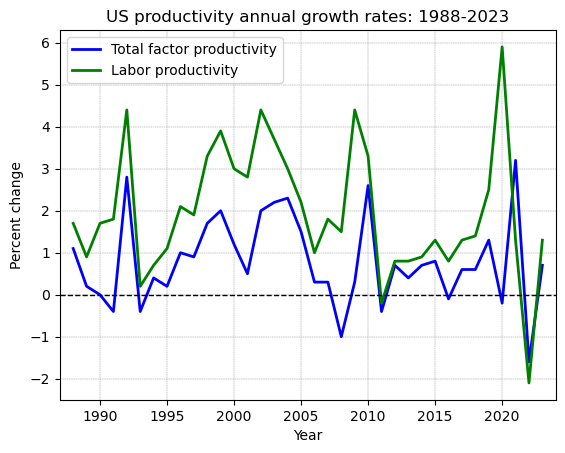

In [52]:
prod_prv_nf_bus_df = prod_df[
    [
        'year', 'tfp_prv_nf_bus_pctchg', 'tfp_prv_nf_bus_index',
        'labprod_prv_nf_bus_pctchg', 'labprod_prv_nf_bus_index'
    ]
][prod_df['year'] >= 1988]
years = prod_prv_nf_bus_df['year'].to_numpy()
tfp_pctchg = prod_prv_nf_bus_df['tfp_prv_nf_bus_pctchg'].to_numpy()
labprod_pctchg = prod_prv_nf_bus_df['labprod_prv_nf_bus_pctchg'].to_numpy()

fig3, ax3= plt.subplots()
ax3.plot(
    years, tfp_pctchg, linestyle='-', color='blue', linewidth=2,
    label='Total factor productivity'
)
ax3.plot(
    years, labprod_pctchg, linestyle='-', color='green', linewidth=2,
    label='Labor productivity'
)
ax3.hlines(
    y=0.0, xmin=1987, xmax=2024, color='black', linestyle='--', linewidth=1
)
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
plt.xlim(1987, 2024)
plt.xlabel("Year")
plt.ylabel("Percent change")
plt.legend()
plt.title("US productivity annual growth rates: 1988-2023")
plt.savefig('./images/us_productivity_pctchg.png')
plt.show()

#### 1.1.4. US productivity index

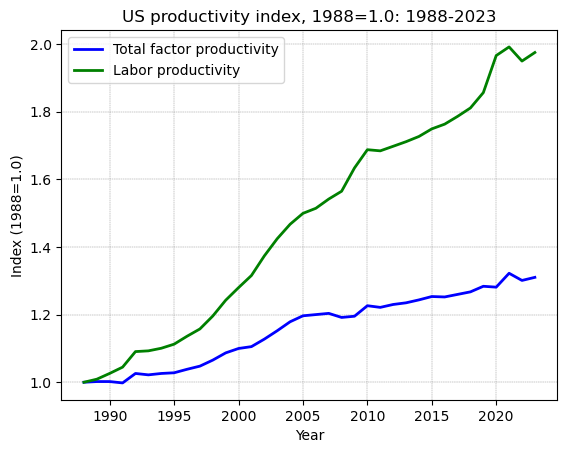

In [54]:
tfp_index = prod_prv_nf_bus_df['tfp_prv_nf_bus_index'].to_numpy()
labprod_index = prod_prv_nf_bus_df['labprod_prv_nf_bus_index'].to_numpy()

fig4, ax4= plt.subplots()
ax4.plot(
    years, tfp_index, linestyle='-', color='blue', linewidth=2,
    label='Total factor productivity'
)
ax4.plot(
    years, labprod_index, linestyle='-', color='green', linewidth=2,
    label='Labor productivity'
)
# ax4.hlines(
#     y=0.0, xmin=1987, xmax=2024, color='black', linestyle='--', linewidth=1
# )
plt.grid(
    visible=True, which='major', axis='both', color='0.5', linestyle='--',
    linewidth=0.3
)
# plt.xlim(1987, 2024)
plt.xlabel("Year")
plt.ylabel("Index (1988=1.0)")
plt.legend()
plt.title("US productivity index, 1988=1.0: 1988-2023")
plt.savefig('./images/us_productivity_index.png')
plt.show()